## Check your runtime environment (optional)

Usually it is recommended to use GPU to train a CNN. Based on our dataset, it takes ~1min to train a single epoch using CPU, while only 10s when using a GPU.

In [0]:
import tensorflow as tf

In [0]:
tf.test.gpu_device_name()  # check available gpu

'/device:GPU:0'

## Load Dataset

In [0]:
from tensorflow.keras.datasets import mnist
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


### Get familiar with your data

In [0]:
y_train.shape

(60000,)

In [0]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [0]:
Counter(y_train)  # Check the distribution of classess

Counter({0: 5923,
         1: 6742,
         2: 5958,
         3: 6131,
         4: 5842,
         5: 5421,
         6: 5918,
         7: 6265,
         8: 5851,
         9: 5949})

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
x_test.shape

(10000, 28, 28)

In [0]:
def show_image(image):
  """A helper to display grey scale image"""
  plt.imshow(image, cmap='Greys')

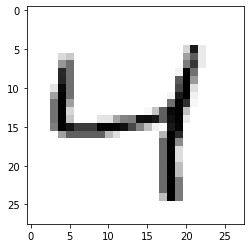

In [0]:
show_image(x_train[2])

## Preprocessing

- Reshape dataset by adding channel dimension (as required by Keras API)
- Normalize data

In [0]:
# Add channel dimension and asting the dtype to float for decimal computation

x_train = np.expand_dims(x_train, -1).astype('float32')  # Add one dim to the end
x_test = np.expand_dims(x_test, -1).astype('float32')

print('Shape of training data:', x_train.shape)
print('Data type of training data:', x_train.dtype)

Shape of training data: (60000, 28, 28, 1)
Data type of training data: float32


In [0]:
# Normalization
x_train /= 255.0
x_test /= 255.0

## Build the Convolutional Neural Network

We will build a netowrk with the following layers:
- Convolutional layer with 28 3X3 kernels
- Max Pooling layer with 2X2 tile
- Flatten layer to convert 2D image into a 1D vector
- Fully connected layer with 128 units
- Output layer with softmax

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [0]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# model.add(Dropout(rate=0.5))  # 0.5 probability to drop a neuron
model.add(Dense(10, activation='softmax'))  # 10 possible output classes

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4732)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               605824    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
_________________________________________________________________


## Compile and train the model

In [0]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [0]:
history = model.fit(
    x=x_train,
    y=y_train,
    validation_data=(x_test, y_test),
    batch_size=16,
    epochs=10
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 314us/sample - loss: 0.1711 - acc: 0.9488 - val_loss: 0.0833 - val_acc: 0.9749
Epoch 2/10
60000/60000 [==============================] - 13s 210us/sample - loss: 0.0598 - acc: 0.9819 - val_loss: 0.0624 - val_acc: 0.9800
Epoch 3/10
60000/60000 [==============================] - 13s 213us/sample - loss: 0.0380 - acc: 0.9879 - val_loss: 0.0614 - val_acc: 0.9805
Epoch 4/10
60000/60000 [==============================] - 13s 212us/sample - loss: 0.0242 - acc: 0.9924 - val_loss: 0.0571 - val_acc: 0.9822
Epoch 5/10
60000/60000 [==============================] - 12s 207us/sample - loss: 0.0184 - acc: 0.9938 - val_loss: 0.0621 - val_acc: 0.9836
Epoch 6/10
60000/60000 [==============================] - 13s 216us/sample - loss: 0.0158 - acc: 0.9944 - val_loss: 0.0729 - val_acc: 0.9823
Epoch 7/10
60000/60000 [==============================] - 13s 211us/sample - loss: 0.0120 - acc: 0.9958 

In [0]:
def plot_history(his, metrics):
  """
  Given a history object returned from `fit` and the name of metrics,
  plot the curve of metrics aginst number of epochs.
  """
  for metric in metrics:
    plt.plot(his.history[metric], label=metric)
  plt.legend()

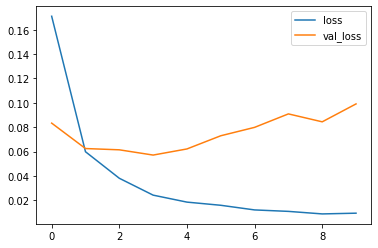

In [0]:
plot_history(history, ['loss', 'val_loss'])

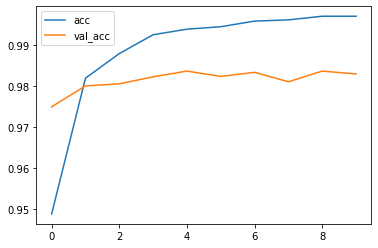

In [0]:
plot_history(history, ['acc', 'val_acc'])

## Predict

In [0]:
def predict_image(model, image):
  # Apply the same pre-processing
  show_image(image)
  pred = model.predict(image.reshape(1, 28, 28, 1))  # reshape to (batch, img_rows, img_cols, channel)
  print("Raw prediction output:", pred)
  print("Predicted number:", pred.argmax())

In [0]:
(_, _), (test_images, _) = mnist.load_data()

Raw prediction output: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Predicted number: 9


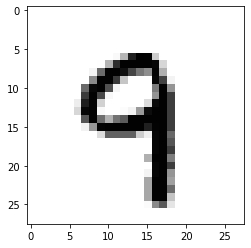

In [0]:
from random import randint

test_image = test_images[randint(1, test_images.shape[0])]
predict_image(model, test_image)